In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

import datetime
from dateutil.parser import parse
from dateutil.tz import gettz

def getTS(dt):
    tzinfos = {'UTC' : gettz('Europe/London')}
    date_str = '{0} 00:00:00'.format(dt)
    str_to_dt = parse(date_str + ' UTC', tzinfos=tzinfos)
    return int(str_to_dt.timestamp())

df = pd.read_csv("C:\\Contents\\Kaggle\\Covid19\\covid19-global-forecasting-week-1\\train.csv", index_col = "Id" )
df['Date'] = df['Date'].apply(getTS)
df.head()


,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
Id,,,,,,,
1,NaN,Afghanistan,33.0,65.0,1579651200,0.0,0.0
2,NaN,Afghanistan,33.0,65.0,1579737600,0.0,0.0
3,NaN,Afghanistan,33.0,65.0,1579824000,0.0,0.0
4,NaN,Afghanistan,33.0,65.0,1579910400,0.0,0.0
5,NaN,Afghanistan,33.0,65.0,1579996800,0.0,0.0


In [25]:
#countryDict = {} 
countries = list(set(df['Country/Region']))
countries.sort()

In [26]:
countryDict = {each : idx for idx,each in enumerate(countries,1)} 

In [27]:
countryDict

{'Afghanistan': 1,
 'Albania': 2,
 'Algeria': 3,
 'Andorra': 4,
 'Antigua and Barbuda': 5,
 'Argentina': 6,
 'Armenia': 7,
 'Aruba': 8,
 'Australia': 9,
 'Austria': 10,
 'Azerbaijan': 11,
 'Bahrain': 12,
 'Bangladesh': 13,
 'Barbados': 14,
 'Belarus': 15,
 'Belgium': 16,
 'Benin': 17,
 'Bhutan': 18,
 'Bolivia': 19,
 'Bosnia and Herzegovina': 20,
 'Brazil': 21,
 'Brunei': 22,
 'Bulgaria': 23,
 'Burkina Faso': 24,
 'Cambodia': 25,
 'Cameroon': 26,
 'Canada': 27,
 'Central African Republic': 28,
 'Chile': 29,
 'China': 30,
 'Colombia': 31,
 'Congo (Brazzaville)': 32,
 'Congo (Kinshasa)': 33,
 'Costa Rica': 34,
 "Cote d'Ivoire": 35,
 'Croatia': 36,
 'Cruise Ship': 37,
 'Cuba': 38,
 'Cyprus': 39,
 'Czechia': 40,
 'Denmark': 41,
 'Djibouti': 42,
 'Dominican Republic': 43,
 'Ecuador': 44,
 'Egypt': 45,
 'Equatorial Guinea': 46,
 'Estonia': 47,
 'Eswatini': 48,
 'Ethiopia': 49,
 'Finland': 50,
 'France': 51,
 'French Guiana': 52,
 'Gabon': 53,
 'Gambia, The': 54,
 'Georgia': 55,
 'Germany': 56

In [28]:
bckupCountry = {'Afghanistan': 1,
 'Albania': 2,
 'Algeria': 3,
 'Andorra': 4,
 'Antigua and Barbuda': 5,
 'Argentina': 6,
 'Armenia': 7,
 'Aruba': 8,
 'Australia': 9,
 'Austria': 10,
 'Azerbaijan': 11,
 'Bahrain': 12,
 'Bangladesh': 13,
 'Barbados': 14,
 'Belarus': 15,
 'Belgium': 16,
 'Benin': 17,
 'Bhutan': 18,
 'Bolivia': 19,
 'Bosnia and Herzegovina': 20,
 'Brazil': 21,
 'Brunei': 22,
 'Bulgaria': 23,
 'Burkina Faso': 24,
 'Cambodia': 25,
 'Cameroon': 26,
 'Canada': 27,
 'Central African Republic': 28,
 'Chile': 29,
 'China': 30,
 'Colombia': 31,
 'Congo (Brazzaville)': 32,
 'Congo (Kinshasa)': 33,
 'Costa Rica': 34,
 "Cote d'Ivoire": 35,
 'Croatia': 36,
 'Cruise Ship': 37,
 'Cuba': 38,
 'Cyprus': 39,
 'Czechia': 40,
 'Denmark': 41,
 'Djibouti': 42,
 'Dominican Republic': 43,
 'Ecuador': 44,
 'Egypt': 45,
 'Equatorial Guinea': 46,
 'Estonia': 47,
 'Eswatini': 48,
 'Ethiopia': 49,
 'Finland': 50,
 'France': 51,
 'French Guiana': 52,
 'Gabon': 53,
 'Gambia, The': 54,
 'Georgia': 55,
 'Germany': 56,
 'Ghana': 57,
 'Greece': 58,
 'Greenland': 59,
 'Guadeloupe': 60,
 'Guam': 61,
 'Guatemala': 62,
 'Guernsey': 63,
 'Guinea': 64,
 'Guyana': 65,
 'Holy See': 66,
 'Honduras': 67,
 'Hungary': 68,
 'Iceland': 69,
 'India': 70,
 'Indonesia': 71,
 'Iran': 72,
 'Iraq': 73,
 'Ireland': 74,
 'Israel': 75,
 'Italy': 76,
 'Jamaica': 77,
 'Japan': 78,
 'Jersey': 79,
 'Jordan': 80,
 'Kazakhstan': 81,
 'Kenya': 82,
 'Korea, South': 83,
 'Kosovo': 84,
 'Kuwait': 85,
 'Kyrgyzstan': 86,
 'Latvia': 87,
 'Lebanon': 88,
 'Liberia': 89,
 'Liechtenstein': 90,
 'Lithuania': 91,
 'Luxembourg': 92,
 'Malaysia': 93,
 'Maldives': 94,
 'Malta': 95,
 'Martinique': 96,
 'Mauritania': 97,
 'Mauritius': 98,
 'Mayotte': 99,
 'Mexico': 100,
 'Moldova': 101,
 'Monaco': 102,
 'Mongolia': 103,
 'Montenegro': 104,
 'Morocco': 105,
 'Namibia': 106,
 'Nepal': 107,
 'Netherlands': 108,
 'New Zealand': 109,
 'Nigeria': 110,
 'North Macedonia': 111,
 'Norway': 112,
 'Oman': 113,
 'Pakistan': 114,
 'Panama': 115,
 'Paraguay': 116,
 'Peru': 117,
 'Philippines': 118,
 'Poland': 119,
 'Portugal': 120,
 'Puerto Rico': 121,
 'Qatar': 122,
 'Republic of the Congo': 123,
 'Reunion': 124,
 'Romania': 125,
 'Russia': 126,
 'Rwanda': 127,
 'Saint Lucia': 128,
 'Saint Vincent and the Grenadines': 129,
 'San Marino': 130,
 'Saudi Arabia': 131,
 'Senegal': 132,
 'Serbia': 133,
 'Seychelles': 134,
 'Singapore': 135,
 'Slovakia': 136,
 'Slovenia': 137,
 'Somalia': 138,
 'South Africa': 139,
 'Spain': 140,
 'Sri Lanka': 141,
 'Sudan': 142,
 'Suriname': 143,
 'Sweden': 144,
 'Switzerland': 145,
 'Taiwan*': 146,
 'Tanzania': 147,
 'Thailand': 148,
 'The Bahamas': 149,
 'The Gambia': 150,
 'Togo': 151,
 'Trinidad and Tobago': 152,
 'Tunisia': 153,
 'Turkey': 154,
 'US': 155,
 'Ukraine': 156,
 'United Arab Emirates': 157,
 'United Kingdom': 158,
 'Uruguay': 159,
 'Uzbekistan': 160,
 'Venezuela': 161,
 'Vietnam': 162,
 'Zambia': 163}

In [29]:
df = df.drop(['Province/State'], axis = 1)

In [30]:
df.isnull().values.any()

False

,Lat,Long,Date,ConfirmedCases,Fatalities
Lat,1.000000e+00,-2.231766e-01,-1.401557e-18,0.028293,0.022433
Long,-2.231766e-01,1.000000e+00,-5.630749e-19,0.087858,0.064426
Date,-1.401557e-18,-5.630749e-19,1.000000e+00,0.065514,0.059523
ConfirmedCases,2.829341e-02,8.785820e-02,6.551429e-02,1.000000,0.955543
Fatalities,2.243288e-02,6.442623e-02,5.952253e-02,0.955543,1.000000


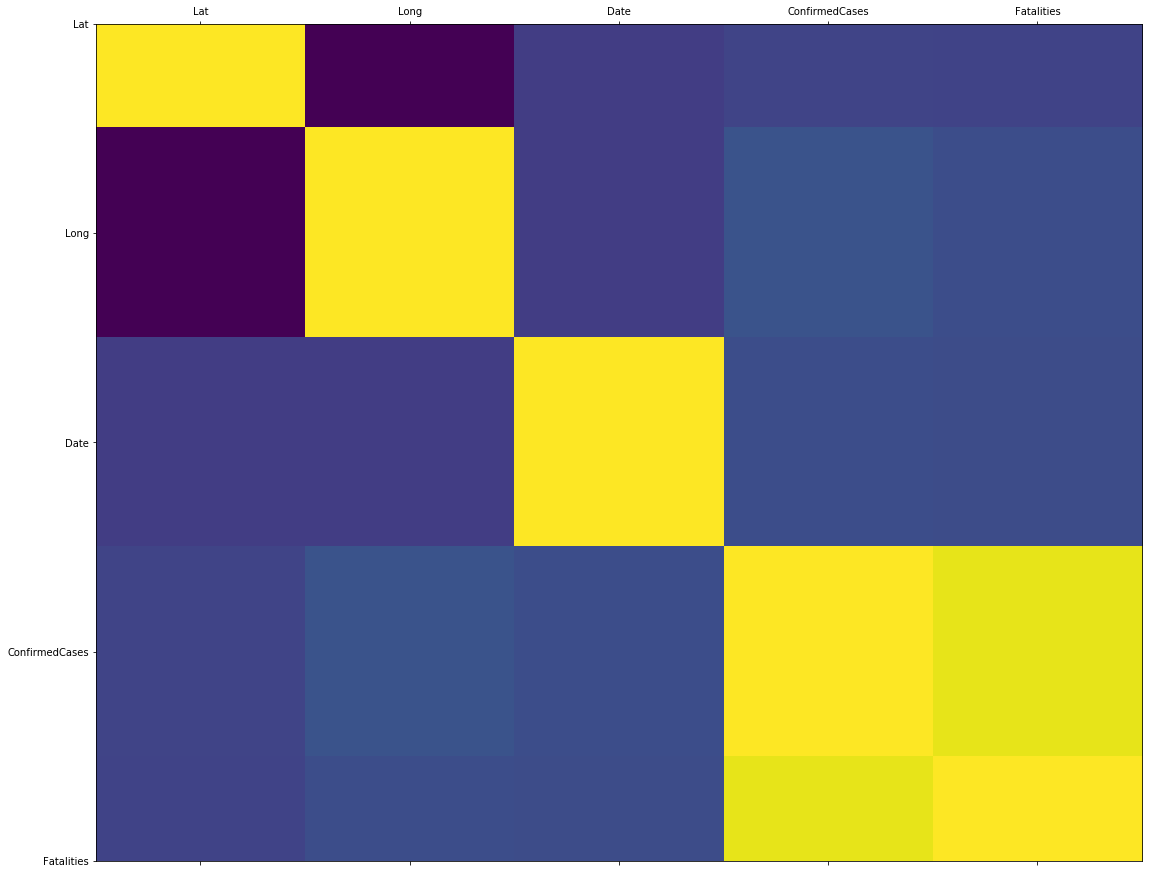

In [31]:
#df = pd.read_csv(r'C:\\Contents\\Kaggle\\Titanic\\titanic\\train_cleaned.csv', index_col = "PassengerId" )
def plot_corr(df,size = 11):
    f = plt.figure(figsize=(19, 15))
    corr = df.corr()
    plt.matshow(corr, fignum=f.number)
    #fig, ax = plt.subplots(size,size)
    #ax.show(corr)
    #plt.plot(ax)
    #ax.matshow(corr)
    #ax.plot(corr)
    #plt.plot(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(df)
df.corr()
#df.isnull().values.any()

In [32]:
#countryDict

df['Country/Region'] = df['Country/Region'].map(countryDict)

In [33]:
basepath = 'C:\\Contents\\Kaggle\\Covid19\\covid19-global-forecasting-week-1\\'

df.to_csv(r'{0}train_cleaned.csv'.format(basepath), index = True)

In [34]:
df.columns

Index(['Country/Region', 'Lat', 'Long', 'Date', 'ConfirmedCases',
       'Fatalities'],
      dtype='object')

In [54]:
from sklearn.model_selection import train_test_split

feature_col_names = ['Country/Region', 'Lat', 'Long', 'Date']
predicted_class_names1 = ['ConfirmedCases']
predicted_class_names2 = ['Fatalities']

X = df[feature_col_names].values
Y1 = df[predicted_class_names1].values
Y2 = df[predicted_class_names2].values
split_test_size = 0.3

#Y = np.log(Y)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X,Y1, test_size=split_test_size, random_state = 42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,Y2, test_size=split_test_size, random_state = 42)

In [42]:
from sklearn.ensemble import GradientBoostingRegressor

regr1 = GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

regr1.fit(X_train1, y_train1.ravel())




GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

RMSE is: 
 70030.53681049623


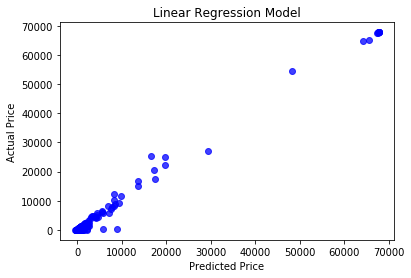

In [43]:

from sklearn.metrics import mean_squared_error


predictions=regr1.predict(X_test1)

print ('RMSE is: \n', mean_squared_error(y_test1.ravel(),predictions))
actual_values=y_test1.ravel()
plt.scatter(predictions,actual_values,alpha=.75,color='b') 
plt.xlabel('Predicted Price') 
plt.ylabel('Actual Price')
plt.title('Linear Regression Model') 
plt.show()

In [55]:
#from sklearn.ensemble import GradientBoostingRegressor

regr1 = GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

regr1.fit(X, Y1.ravel())



regr2 = GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

regr2.fit(X, Y2.ravel())




GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [49]:

dft = pd.read_csv("C:\\Contents\\Kaggle\\Covid19\\covid19-global-forecasting-week-1\\test.csv", index_col = "ForecastId" )
dft['Date'] = dft['Date'].apply(getTS)
dft.head()

,Province/State,Country/Region,Lat,Long,Date
ForecastId,,,,,
1,NaN,Afghanistan,33.0,65.0,1583971200
2,NaN,Afghanistan,33.0,65.0,1584057600
3,NaN,Afghanistan,33.0,65.0,1584144000
4,NaN,Afghanistan,33.0,65.0,1584230400
5,NaN,Afghanistan,33.0,65.0,1584316800


In [50]:

dft['Country/Region'] = dft['Country/Region'].map(countryDict)

In [51]:
dft = dft.drop(['Province/State'], axis = 1)

In [52]:
dft.isnull().values.any()

False

In [53]:

feature_col_names = ['Country/Region', 'Lat', 'Long', 'Date']
#predicted_class_names1 = ['ConfirmedCases']
#predicted_class_names2 = ['Fatalities']

Xt = dft[feature_col_names].values

In [57]:
predictionsC = regr1.predict(Xt) 
predictionsF = regr2.predict(Xt) 

In [58]:
dft['ConfirmedCases'] = predictionsC
dft['Fatalities'] = predictionsF

allowedCols =['ForecastId','ConfirmedCases','Fatalities']



#allowedCols = ['Id','SalePrice']
for col in dft.columns:
    if col not in allowedCols:
        dft = dft.drop([col], axis = 1)
        print("Dropping {0}".format(col))

Dropping Country/Region
Dropping Lat
Dropping Long
Dropping Date


In [59]:
dft.to_csv(r'{0}gradientBoost_result_01.csv'.format(basepath), index = True)

In [64]:
def normalize(val):
    if val > 0:
        return round(val)
    return 0

In [65]:
dft['ConfirmedCases'] = dft['ConfirmedCases'].apply(normalize)
dft['Fatalities'] = dft['Fatalities'].apply(normalize)
dft.to_csv(r'{0}gradientBoost_result_02.csv'.format(basepath), index = True)